In [214]:
# Load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [215]:
# Load training dataset
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

In [216]:
# Create column indicating if record is from training or test set
df_train['train/test'] = 'train'
df_test['train/test'] = 'test'

In [217]:
df_test.shape

(878, 81)

In [218]:
df_train.shape

(2051, 82)

In [219]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,train/test
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,130500,train
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,220000,train
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,109000,train
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,174000,train
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,138500,train


In [220]:
# View data
df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [221]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

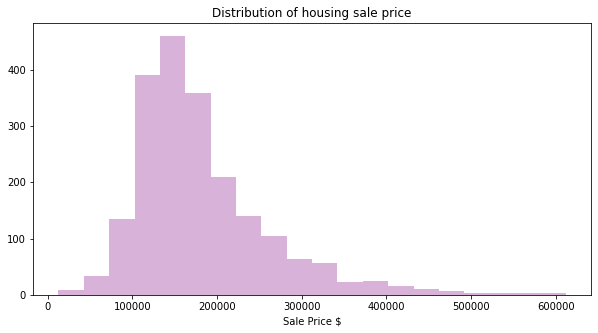

In [222]:
# Histogram of Sale Price

# Size
plt.figure(figsize = (10, 5))
# Plot it
# colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
plt.hist(df_train['SalePrice'], color = 'purple', alpha=0.3, bins=20)
#df_train['SalePrice'].plot(kind = "kde", color='purple')




# Create a descriptive title
plt.title('Distribution of housing sale price')
# Do we need axis lables here?
plt.xlabel('Sale Price $')

plt.savefig('../figs/price_hist.png')

In [223]:
# Drop outliers from training data
df_train[df_train['Gr Liv Area'] > 4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,train/test
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,160000,train
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,183850,train


In [224]:
# Drop rows with signinificant missing data
df_train = df_train.drop(index = [960, 1885])

In [225]:
# Combine the training and test dataset into one Data Frame to perform cleaning steps to both simultaneously
df = pd.concat([df_train, df_test])

In [226]:
df.shape

(2927, 82)

In [227]:
# Drop rows with significant missing data
df = df.drop(index = [1327, 1712])


In [228]:
# Drop Identifier columns
df.drop(columns = ['PID'], inplace = True)

In [229]:
df.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish',

In [230]:
# ID all nominal variables
nominal = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
        'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type', 
        'Mo Sold', 'Yr Sold']

In [231]:
# ID all ordinal variables
ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Cond', 
           'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 
           'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 
          'Pool QC', 'Fence', 'Overall Qual', 'SalePrice']

In [232]:
# ID all discrete variables
discrete = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
           'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'SalePrice']

In [233]:
# ID all continuous variablse
continuous = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
             'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area',
             'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',
             'Misc Val', 'SalePrice']

# Clean the continuous variables

In [234]:
# Lets start with the continuous variables
df_c = df[continuous]

In [235]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 877
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2435 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Mas Vnr Area     2902 non-null   float64
 3   BsmtFin SF 1     2925 non-null   float64
 4   BsmtFin SF 2     2925 non-null   float64
 5   Bsmt Unf SF      2925 non-null   float64
 6   Total Bsmt SF    2925 non-null   float64
 7   1st Flr SF       2925 non-null   int64  
 8   2nd Flr SF       2925 non-null   int64  
 9   Low Qual Fin SF  2925 non-null   int64  
 10  Gr Liv Area      2925 non-null   int64  
 11  Garage Area      2925 non-null   float64
 12  Wood Deck SF     2925 non-null   int64  
 13  Open Porch SF    2925 non-null   int64  
 14  Enclosed Porch   2925 non-null   int64  
 15  3Ssn Porch       2925 non-null   int64  
 16  Screen Porch     2925 non-null   int64  
 17  Pool Area      

In [236]:
# TRANSFORMATIONS FOR CONTINUOUS VARIABLES
# Fill the NAs for these columns with 0
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df_c = df[continuous]
df_c.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 877
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Mas Vnr Area     2925 non-null   float64
 3   BsmtFin SF 1     2925 non-null   float64
 4   BsmtFin SF 2     2925 non-null   float64
 5   Bsmt Unf SF      2925 non-null   float64
 6   Total Bsmt SF    2925 non-null   float64
 7   1st Flr SF       2925 non-null   int64  
 8   2nd Flr SF       2925 non-null   int64  
 9   Low Qual Fin SF  2925 non-null   int64  
 10  Gr Liv Area      2925 non-null   int64  
 11  Garage Area      2925 non-null   float64
 12  Wood Deck SF     2925 non-null   int64  
 13  Open Porch SF    2925 non-null   int64  
 14  Enclosed Porch   2925 non-null   int64  
 15  3Ssn Porch       2925 non-null   int64  
 16  Screen Porch     2925 non-null   int64  
 17  Pool Area      

<AxesSubplot:>

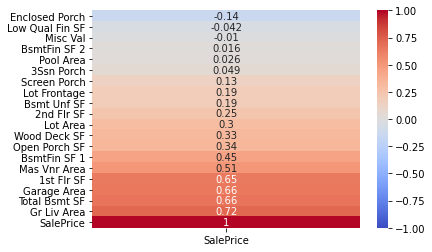

In [237]:
sns.heatmap(df_c.corr()[['SalePrice']].sort_values('SalePrice'),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='coolwarm')

/Users/adrianchapman/Dev/virtualenvs/py3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


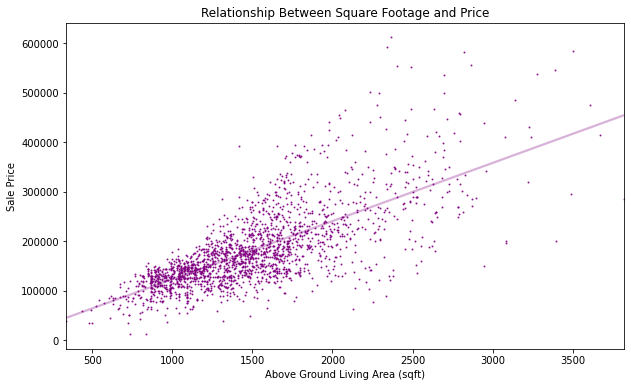

In [238]:
# Plot relationship between square footage and sale price
plt.figure(figsize = (10, 6))
sns.regplot('Gr Liv Area', 'SalePrice', df, ci=None, 
            scatter_kws = {'s': 1}, color = 'purple', 
            line_kws = {'color': 'purple', 'alpha': 0.3})
#plt.axhline(elec['demand'].mean(), color = 'grey')
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Sale Price')
plt.title('Relationship Between Square Footage and Price')
plt.savefig('../figs/sqft_scatter.png');

# Clean the discrete variables

In [239]:
# Create dataframe for discrete variables
df_d = df[discrete]

In [240]:
df_d.head()

,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,SalePrice
0,1976,2005,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,130500.0
1,1996,1997,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,220000.0
2,1953,2007,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,109000.0
3,2006,2007,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,174000.0
4,1900,1993,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,138500.0


In [241]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 877
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      2925 non-null   int64  
 1   Year Remod/Add  2925 non-null   int64  
 2   Bsmt Full Bath  2924 non-null   float64
 3   Bsmt Half Bath  2924 non-null   float64
 4   Full Bath       2925 non-null   int64  
 5   Half Bath       2925 non-null   int64  
 6   Bedroom AbvGr   2925 non-null   int64  
 7   Kitchen AbvGr   2925 non-null   int64  
 8   TotRms AbvGrd   2925 non-null   int64  
 9   Fireplaces      2925 non-null   int64  
 10  Garage Yr Blt   2767 non-null   float64
 11  Garage Cars     2925 non-null   float64
 12  SalePrice       2047 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 319.9 KB


In [242]:
# Explore some individual variables
df_d['Bsmt Half Bath'].sort_values()

0       0.0
1924    0.0
1925    0.0
1926    0.0
1927    0.0
       ... 
761     2.0
1280    2.0
1137    2.0
1519    2.0
616     NaN
Name: Bsmt Half Bath, Length: 2925, dtype: float64

In [243]:
# Explore individual variables
test_vars = ['Garage Yr Blt', 'SalePrice']
df_test = df_d[test_vars]
df_test.corr()

,Garage Yr Blt,SalePrice
Garage Yr Blt,1.000000,0.534096
SalePrice,0.534096,1.000000


In [244]:
# TRANSFORMATIONS FOR DISCRETE VARIABLES
df['Bsmt Full Bath'] = df['Bsmt Full Bath'].fillna(0)
df['Bsmt Half Bath'] = df['Bsmt Half Bath'].fillna(0)
df['Garage Yr Blt'] = df.groupby("Year Built").transform(lambda x: x.fillna(x.mean()))
df['Age when sold'] = df['Yr Sold'] - df['Year Built']
df['Time Since Remodle'] = df['Yr Sold'] - df['Year Remod/Add']
df['Total Bath'] = df['Bsmt Full Bath'] + df['Bsmt Half Bath']*.5 + df['Full Bath'] + df['Half Bath']*.5
new_discrete = ['Age when sold', 'Time Since Remodle', 'Total Bath']
discrete.extend(new_discrete)
df_d = df[discrete]
df_d.info()

# For imputing with a group-by mean:
# https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 877
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year Built          2925 non-null   int64  
 1   Year Remod/Add      2925 non-null   int64  
 2   Bsmt Full Bath      2925 non-null   float64
 3   Bsmt Half Bath      2925 non-null   float64
 4   Full Bath           2925 non-null   int64  
 5   Half Bath           2925 non-null   int64  
 6   Bedroom AbvGr       2925 non-null   int64  
 7   Kitchen AbvGr       2925 non-null   int64  
 8   TotRms AbvGrd       2925 non-null   int64  
 9   Fireplaces          2925 non-null   int64  
 10  Garage Yr Blt       2925 non-null   float64
 11  Garage Cars         2925 non-null   float64
 12  SalePrice           2047 non-null   float64
 13  Age when sold       2925 non-null   int64  
 14  Time Since Remodle  2925 non-null   int64  
 15  Total Bath          2925 non-null   float64
dtypes: floa

<AxesSubplot:>

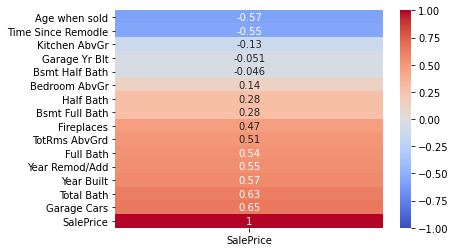

In [245]:
# Heatmap for discrete variable correlation with sale price
sns.heatmap(df_d.corr()[['SalePrice']].sort_values('SalePrice'),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='coolwarm')

In [246]:
# Function for use with ridge plot - see source in next block
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.1, .2, label, fontweight="bold", color="black",
            ha="left", va="center", transform=ax.transAxes)

/Users/adrianchapman/Dev/virtualenvs/py3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/adrianchapman/Dev/virtualenvs/py3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/adrianchapman/Dev/virtualenvs/py3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/adrianchapman/Dev/virtualenvs/

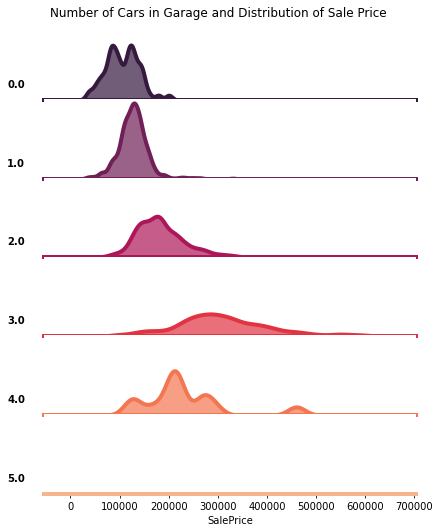

In [247]:
# Ridge plot for number of garage spaces and sale price.  See source below.
ridge_plot = sns.FacetGrid(df, row="Garage Cars", hue="Garage Cars", aspect=5, height=1.25, palette = 'rocket')
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "SalePrice", clip_on=False, shade=True, alpha=0.7, lw=4, bw=.2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=4, clip_on=False)
ridge_plot.map(label, "SalePrice")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.01)
# Remove axes details that don't play well with overlap
ridge_plot.set_titles("")
ridge_plot.set(yticks=[])
#ridge_plot.set_xlabel("CO2 Emission",fontsize=30)
ridge_plot.despine(bottom=True, left=True)
ridge_plot.fig.suptitle('Number of Cars in Garage and Distribution of Sale Price')
ridge_plot.savefig("../figs/ridgeline_num_cars.png")
#https://datavizpyr.com/ridgeline-plot-in-python-with-seaborn/

# Clean the nominal variables

In [248]:
# Create a dataframe for nominal variables
df_n = df[nominal]
df_n.head()

,MS SubClass,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,...,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Misc Feature,Sale Type,Mo Sold,Yr Sold
0,60,RL,Pave,NaN,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,...,Plywood,BrkFace,CBlock,GasA,Y,Attchd,NaN,WD,3,2010
1,60,RL,Pave,NaN,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,...,VinylSd,BrkFace,PConc,GasA,Y,Attchd,NaN,WD,4,2009
2,20,RL,Pave,NaN,Lvl,Inside,NAmes,Norm,Norm,1Fam,...,VinylSd,None,CBlock,GasA,Y,Detchd,NaN,WD,1,2010
3,60,RL,Pave,NaN,Lvl,Inside,Timber,Norm,Norm,1Fam,...,VinylSd,None,PConc,GasA,Y,BuiltIn,NaN,WD,4,2010
4,50,RL,Pave,NaN,Lvl,Inside,SawyerW,Norm,Norm,1Fam,...,Plywood,None,PConc,GasA,Y,Detchd,NaN,WD,3,2010


In [249]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 877
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MS SubClass   2925 non-null   int64 
 1   MS Zoning     2925 non-null   object
 2   Street        2925 non-null   object
 3   Alley         198 non-null    object
 4   Land Contour  2925 non-null   object
 5   Lot Config    2925 non-null   object
 6   Neighborhood  2925 non-null   object
 7   Condition 1   2925 non-null   object
 8   Condition 2   2925 non-null   object
 9   Bldg Type     2925 non-null   object
 10  House Style   2925 non-null   object
 11  Roof Style    2925 non-null   object
 12  Roof Matl     2925 non-null   object
 13  Exterior 1st  2925 non-null   object
 14  Exterior 2nd  2925 non-null   object
 15  Mas Vnr Type  2902 non-null   object
 16  Foundation    2925 non-null   object
 17  Heating       2925 non-null   object
 18  Central Air   2925 non-null   object
 19  Garage 

In [250]:
# TRANSFORMATIONS FOR NOMINAL VARIABLES
df['Alley'] = df['Alley'].fillna('None')
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Garage Type'] = df['Garage Type'].fillna('None')
df['Misc Feature'] = df['Misc Feature'].fillna('None')
df['MS SubClass'] = df['MS SubClass'].astype(str)
df_n = df[nominal]
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 877
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MS SubClass   2925 non-null   object
 1   MS Zoning     2925 non-null   object
 2   Street        2925 non-null   object
 3   Alley         2925 non-null   object
 4   Land Contour  2925 non-null   object
 5   Lot Config    2925 non-null   object
 6   Neighborhood  2925 non-null   object
 7   Condition 1   2925 non-null   object
 8   Condition 2   2925 non-null   object
 9   Bldg Type     2925 non-null   object
 10  House Style   2925 non-null   object
 11  Roof Style    2925 non-null   object
 12  Roof Matl     2925 non-null   object
 13  Exterior 1st  2925 non-null   object
 14  Exterior 2nd  2925 non-null   object
 15  Mas Vnr Type  2925 non-null   object
 16  Foundation    2925 non-null   object
 17  Heating       2925 non-null   object
 18  Central Air   2925 non-null   object
 19  Garage 

In [251]:
# Get a list of all neighborhoods
hood_list = list(df.groupby('Neighborhood').SalePrice.mean().sort_values(ascending=False).index)
hood_list

['StoneBr',
 'NridgHt',
 'NoRidge',
 'GrnHill',
 'Veenker',
 'Timber',
 'Somerst',
 'ClearCr',
 'Crawfor',
 'CollgCr',
 'Blmngtn',
 'NWAmes',
 'Gilbert',
 'Greens',
 'SawyerW',
 'Mitchel',
 'NAmes',
 'Blueste',
 'NPkVill',
 'Sawyer',
 'Landmrk',
 'SWISU',
 'Edwards',
 'BrkSide',
 'OldTown',
 'BrDale',
 'IDOTRR',
 'MeadowV']

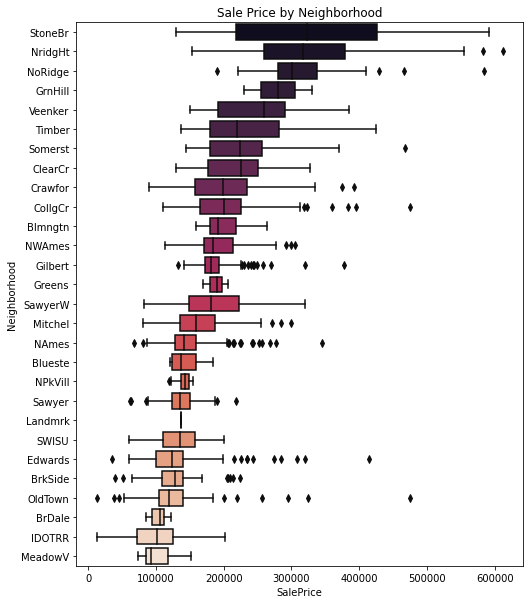

In [252]:
# Make a boxplot for sale price by neighborhood
plt.figure(figsize = (8, 10))
sns.boxplot(y = 'Neighborhood', x = 'SalePrice', data=df, palette='rocket', order = hood_list).set_title("Sale Price by Neighborhood");
plt.savefig("../figs/boxplot_neighborhoods.png")

In [253]:
# One hot encode to get all dummy variables for nominal variables
df = pd.get_dummies(df, columns=nominal, drop_first=True)

# Clean ordinal variables

In [254]:
# Create a dataframe for ordinal variables
df_o = df[ordinal]
df_o.head()

,Lot Shape,Utilities,Land Slope,Overall Cond,Exter Qual,Exter Cond,Bsmt Cond,Bsmt Qual,Bsmt Exposure,BsmtFin Type 1,...,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Overall Qual,SalePrice
0,IR1,AllPub,Gtl,8,Gd,TA,TA,TA,No,GLQ,...,Typ,NaN,RFn,TA,TA,Y,NaN,NaN,6,130500.0
1,IR1,AllPub,Gtl,5,Gd,TA,TA,Gd,No,GLQ,...,Typ,TA,RFn,TA,TA,Y,NaN,NaN,7,220000.0
2,Reg,AllPub,Gtl,7,TA,Gd,TA,TA,No,GLQ,...,Typ,NaN,Unf,TA,TA,Y,NaN,NaN,5,109000.0
3,Reg,AllPub,Gtl,5,TA,TA,TA,Gd,No,Unf,...,Typ,NaN,Fin,TA,TA,Y,NaN,NaN,5,174000.0
4,IR1,AllPub,Gtl,8,TA,TA,Gd,Fa,No,Unf,...,Typ,NaN,Unf,TA,TA,N,NaN,NaN,6,138500.0


In [255]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 877
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Shape       2925 non-null   object 
 1   Utilities       2925 non-null   object 
 2   Land Slope      2925 non-null   object 
 3   Overall Cond    2925 non-null   int64  
 4   Exter Qual      2925 non-null   object 
 5   Exter Cond      2925 non-null   object 
 6   Bsmt Cond       2846 non-null   object 
 7   Bsmt Qual       2846 non-null   object 
 8   Bsmt Exposure   2843 non-null   object 
 9   BsmtFin Type 1  2846 non-null   object 
 10  BsmtFin Type 2  2845 non-null   object 
 11  Heating QC      2925 non-null   object 
 12  Electrical      2924 non-null   object 
 13  Kitchen Qual    2925 non-null   object 
 14  Functional      2925 non-null   object 
 15  Fireplace Qu    1505 non-null   object 
 16  Garage Finish   2767 non-null   object 
 17  Garage Qual     2767 non-null   ob

In [256]:
# TRANSFORMATIONS FOR ORDINAL VARIABLES
df['Lot Shape'] = df['Lot Shape'].map({'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4})
df['Utilities'] = df['Utilities'].map({'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4})
df['Land Slope'] = df['Land Slope'].map({'Sev': 1, 'Mod': 2, 'Gtl': 3})
df['Exter Qual'] = df['Exter Qual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['Exter Cond'] = df['Exter Cond'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['Bsmt Cond'] = df['Bsmt Cond'].fillna('None')
df['Bsmt Cond'] = df['Bsmt Cond'].map({'None' : 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['Bsmt Qual'] = df['Bsmt Qual'].fillna('None')
df['Bsmt Qual'] = df['Bsmt Qual'].map({'None' : 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna('None')
df['Bsmt Exposure'] = df['Bsmt Exposure'].map({'None' : 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna('None')
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'None' : 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna('None')
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map({'None' : 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df['Heating QC'] = df['Heating QC'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['Electrical'] = df['Electrical'].map({'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5})
df['Kitchen Qual'] = df['Kitchen Qual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['Functional'] = df['Functional'].map({'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5 , 'Min2': 6 , 'Min1': 7 , 'Typ': 8})
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')
df['Fireplace Qu'] = df['Fireplace Qu'].map({'None' : 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['Garage Finish'] = df['Garage Finish'].fillna('None')
df['Garage Finish'] = df['Garage Finish'].map({'None' : 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
df['Garage Qual'] = df['Garage Qual'].fillna('None')
df['Garage Qual'] = df['Garage Qual'].map({'None' : 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['Garage Cond'] = df['Garage Cond'].fillna('None')
df['Garage Cond'] = df['Garage Cond'].map({'None' : 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['Paved Drive'] = df['Paved Drive'].map({'N' : 1, 'P': 2, 'Y': 3})
df['Pool QC'] = df['Pool QC'].fillna('None')
df['Pool QC'] = df['Pool QC'].map({'None' : 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
df['Fence'] = df['Fence'].fillna('None')
df['Fence'] = df['Fence'].map({'None' : 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})
df_o = df[ordinal]
df_o.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 877
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Shape       2925 non-null   int64  
 1   Utilities       2925 non-null   int64  
 2   Land Slope      2925 non-null   int64  
 3   Overall Cond    2925 non-null   int64  
 4   Exter Qual      2925 non-null   int64  
 5   Exter Cond      2925 non-null   int64  
 6   Bsmt Cond       2925 non-null   int64  
 7   Bsmt Qual       2925 non-null   int64  
 8   Bsmt Exposure   2925 non-null   int64  
 9   BsmtFin Type 1  2925 non-null   int64  
 10  BsmtFin Type 2  2925 non-null   int64  
 11  Heating QC      2925 non-null   int64  
 12  Electrical      2925 non-null   int64  
 13  Kitchen Qual    2925 non-null   int64  
 14  Functional      2925 non-null   int64  
 15  Fireplace Qu    2925 non-null   int64  
 16  Garage Finish   2925 non-null   int64  
 17  Garage Qual     2925 non-null   in

<AxesSubplot:>

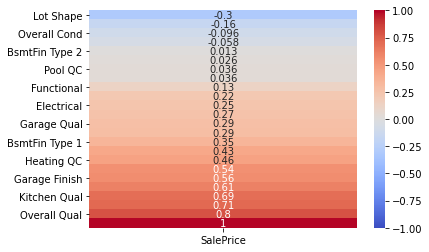

In [257]:
# Heatmap for correlations between ordinal variables and sale price
sns.heatmap(df_o.corr()[['SalePrice']].sort_values('SalePrice'),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='coolwarm')

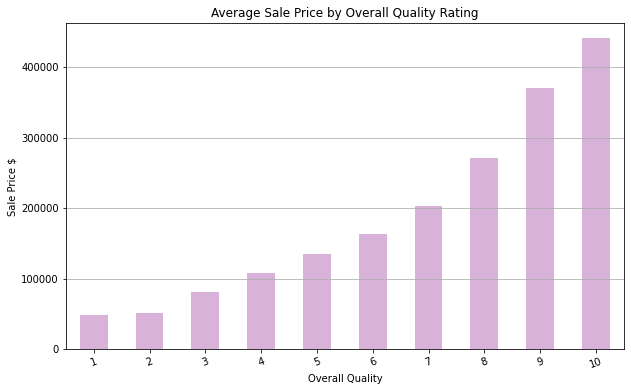

In [258]:
# Create a bar plot for overall qual variable and mean sale price

qual = df.groupby('Overall Qual').SalePrice.mean()

#increase size
plt.figure(figsize = (10,6))


qual.plot.bar(color='purple', alpha = .3)
plt.grid(axis='y')


# rotate lable names
plt.xticks(rotation = 20)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price $')

# title
plt.title('Average Sale Price by Overall Quality Rating')
plt.savefig("../figs/barplot_qualtiy.png")

# Explore all features

In [259]:
df.columns

Index(['Id', 'Lot Frontage', 'Lot Area', 'Lot Shape', 'Utilities',
       'Land Slope', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add',
       ...
       'Mo Sold_7', 'Mo Sold_8', 'Mo Sold_9', 'Mo Sold_10', 'Mo Sold_11',
       'Mo Sold_12', 'Yr Sold_2007', 'Yr Sold_2008', 'Yr Sold_2009',
       'Yr Sold_2010'],
      dtype='object', length=235)

In [260]:
df.shape

(2925, 235)

In [261]:
# Find the features most correlated with sale price
cor = df.corr()
#Correlation with target variable
cor_target = abs(cor["SalePrice"])

#selecting features with correlation strength of 0.2 or above
relevant_features = cor_target[cor_target>0.4]
relevant_features = list(relevant_features.index)
df_heat = df[relevant_features]

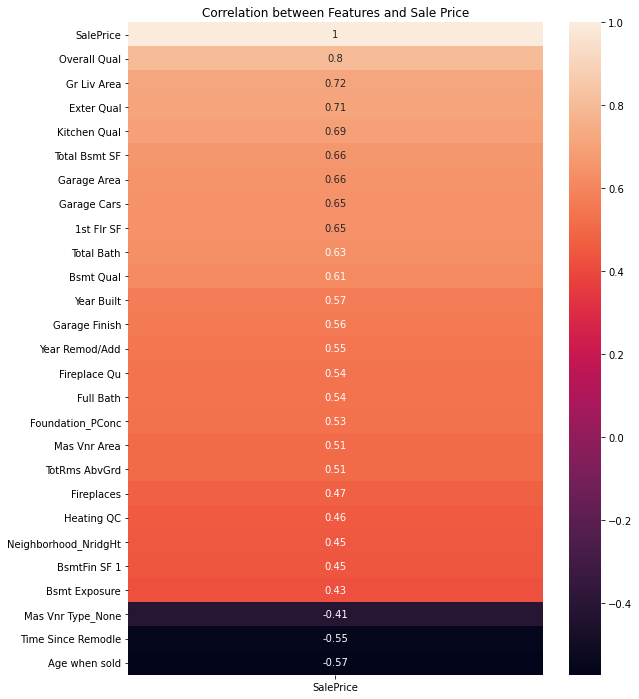

In [262]:
# Plot the most correlated featuers in a heatmap with sale price
plt.figure(figsize = (12, 12))
corr = df_heat.corr()
corr_sort = corr.sort_values(by = ['SalePrice'], axis = 0, ascending = False)
corr_sort
sns.heatmap(corr_sort[['SalePrice']], annot=True)
plt.title('Correlation between Features and Sale Price')
plt.subplots_adjust(left=0.3)

plt.savefig("../figs/corr_heatmap.png");



# Split and save train/test dataframes

In [263]:
# Split the dataframe back into train and test
df_train_clean = df[df['train/test'] == 'train']
df_test_clean = df[df['train/test'] == 'test']

In [264]:
df_train_clean.shape

(2047, 235)

In [265]:
df_test_clean.shape

(878, 235)

In [266]:
# Drop 'train/test' column and 'SalePrice' for the test set
df_train_clean = df_train_clean.drop(columns='train/test')
df_test_clean = df_test_clean.drop(columns=['SalePrice', 'train/test'])


In [267]:
# Double check there are no missing values
df_train_clean.isnull().sum().sum()

0

In [268]:
# Double check there are no missing values
df_test_clean.isnull().sum().sum()

0

In [1043]:
# Save the new datasets into their own clean files
df_train_clean.to_csv('../datasets/train_clean_features.csv', index=False)
df_test_clean.to_csv('../datasets/test_clean_features.csv', index=False)